# U.S. Medical Insurance Costs

## Preface : It's my first data science project. Basically, I refer to the notes in Codecademy's forum, and add some of my own thoughts. After trying many different ways to express my ideas, I thought the best way to convey is graphing. A picture worths thousands words. Hope all you guys like it. If you have some questions or any suggestion, please message me. Thank you.

# Goals : 
## Some possible ideas for analysis are the following:

## 1. Find out the average age of the patients in the dataset.
## 2. Analyze where a majority of the individuals are from.
## 3. Look at the different costs between smokers vs. non-smokers.
## 4. Figure out what the average age is for someone who has at least one child in this dataset.
## 5. try to find the `relationship` between on target and the other.

In [1]:
import csv
from matplotlib import pyplot as plt

my_data = {}
continuous_data= ['age', 'bmi', 'charges']
discrete_data = ['sex', 'smoker', 'region', 'children']

def avr(label): # for age, bmi, and charges.
    sum = 0
    length = len(my_data)
    for i in range(len(my_data)):
        try:
            sum += float(my_data[i][label])
        except KeyError:
            print("Please input string label, such as age, bmi, charges.")
            break
    return (sum/length)

def count_people(label): # for sex, children, smoker, region.
    my_dict_ori = {}
    my_dict = {}
    values = list(my_data.values())
    for i in values:
        temp = i[label] 
        if temp not in my_dict_ori:
            my_dict_ori[temp] = 1
        else :
            my_dict_ori[temp] += 1
    for i in sorted(my_dict_ori): # sorting the keys.
        my_dict[i] = my_dict_ori[i]
    return my_dict
    
def draw_pic(label): # for sex, children, smoker, region.
    dictionary = count_people(label)
    x_label = list(dictionary.keys())
    count = list(dictionary.values())
    # x = np.arange(len(x_label))
    x = list(range(len(x_label)))  # 數總共有幾個標籤
    def statement():
        print("{label_1} vs number of people: {form}".format(label_1 = label, form = str(dictionary)))
    statement()

    plt.bar(x, count, color = 'deepskyblue')
    plt.xticks(x, x_label) # transfer the x values to its correspond label.
    plt.xlabel(label.upper())
    plt.ylabel('number of people')
    plt.show()

def find_relationship(label_1, label_2): # try to find out relationship between simple and multi data.
    x = []
    y = []
    x_label = []
    calc = {}
    sort_calc = {}
    average = avr(label_2)
    values = list(my_data.values())
    if label_1 in discrete_data and label_2 in continuous_data:
        for i in values:
            x.append(i[label_1])
            y.append(float(i[label_2]))
        for i in x:
            if i not in x_label:
                x_label.append(i)
        for i in x_label:
            calc[i] = 0
    
        combine = list(zip(x,y)) 

        for data in combine:
            calc[data[0]] += data[1]

        people = count_people(label_1)
        for key in list(people.keys()):
            calc[key] = calc[key]/people[key]
        for i in sorted(calc):  # sort the key. 
            sort_calc[i] = calc[i]
        # drawing
        x_label = list(sort_calc.keys())
        avr_value = list(sort_calc.values())
        x = list(range(len(x_label)))
        plt.bar(x, avr_value, color = 'green')
        plt.xticks(x, x_label)
        plt.xlabel(label_1.upper())
        plt.ylabel("the average "+label_2.upper()+" of "+label_1)

        print(label_1 + ' vs '+ label_2+' : ' + str(sort_calc), '\n')  # the output would be "yes":average_...
        print('the average {label} is : {value}'.format(label = label_2, value =str(average)), '\n')
        for i in list(sort_calc.keys()):
            if sort_calc[i] < average:
                print("The "+label_2+' of '+i+' '+label_1+" is below the average "+label_2+'.')
            elif sort_calc[i] > average:
                print("The "+label_2+' of '+i+' '+label_1+" is above the average "+label_2+'.')
            else:
                print("The "+label_2+' of '+i+' '+label_1+" is equal to average "+label_2+'.')
        
    else:
        return "Please choose label_1 as simple_data and label_2 as multi_data."

def majority(label):
    index = 0
    dictionary = count_people(label)
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    max = values[0]
    for i in range(1, len(values)):
        if values[i] > max:
            max = values[i]
            index = i
    word = "The majority of {label_1} is {key}.".format(label_1 = label, key = keys[index])
    return word
    
with open('insurance.csv') as csv_insurance:
    reader = csv.DictReader(csv_insurance)
    num = 0
    for i in reader:
        my_data[num] = i
        num += 1
# print(my_data) 
# my_data = 
# {0: {'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
# , 1: {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}...

avr_age = avr('age')
avr_bmi = avr('bmi')
avr_charges = avr('charges')



# Analyze the majority of individuals are from.

region vs number of people: {'northeast': 324, 'northwest': 325, 'southeast': 364, 'southwest': 325}


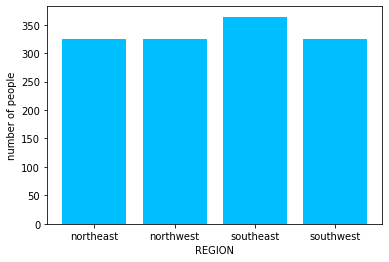

The majority of region is southeast.


In [2]:
draw_pic('region')
print(majority('region'))

# The relationship between `region` and `charges` : 

region vs charges : {'northeast': 13406.3845163858, 'northwest': 12417.575373969228, 'southeast': 14735.411437609895, 'southwest': 12346.93737729231} 

the average charges is : 13270.422265141257 

The charges of northeast region is above the average charges.
The charges of northwest region is below the average charges.
The charges of southeast region is above the average charges.
The charges of southwest region is below the average charges.


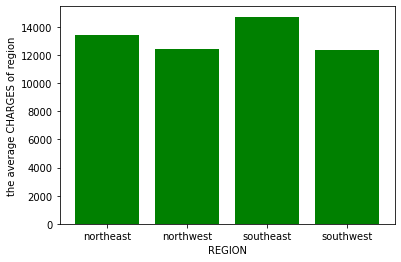

In [3]:
find_relationship('region', 'charges')

# The relationship between `smoker` and `charges` :

smoker vs charges : {'no': 8434.268297856199, 'yes': 32050.23183153285} 

the average charges is : 13270.422265141257 

The charges of no smoker is below the average charges.
The charges of yes smoker is above the average charges.


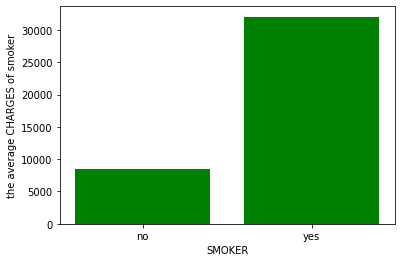

In [4]:
find_relationship('smoker', 'charges')

# The relationship between `children` and `age` : 

children vs age : {'0': 38.444250871080136, '1': 39.4537037037037, '2': 39.44583333333333, '3': 41.56687898089172, '4': 39.0, '5': 35.611111111111114} 

the average age is : 39.20702541106129 

The age of 0 children is below the average age.
The age of 1 children is above the average age.
The age of 2 children is above the average age.
The age of 3 children is above the average age.
The age of 4 children is below the average age.
The age of 5 children is below the average age.


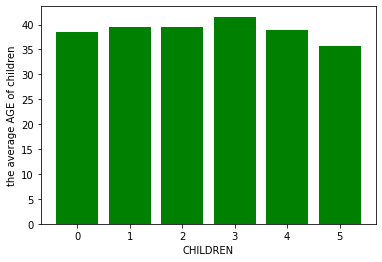

In [5]:
find_relationship('children', 'age')